<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB3/blob/main/6351071072_LAB3_Bai2(Trang_18_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- CELL 1: CÂU 1 (Nhập dữ liệu từ file upload) ---
print("Nguyễn Đức Trung - 6351071072")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import os

warnings.filterwarnings('ignore')
os.environ['OMP_NUM_THREADS'] = '1'

try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Đã đọc file 'Mall_Customers.csv' thành công!")
except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'Mall_Customers.csv'.")

df.rename(columns={
    'Gender': 'GioiTinh',
    'Age': 'Tuoi',
    'Annual Income (k$)': 'ThuNhap',
    'Spending Score (1-100)': 'DiemMuaSam'
}, inplace=True)

display(df.head())
print(df.info())
print(df.isnull().sum())
display(df.describe())

Nguyễn Đức Trung - 6351071072
Đã đọc file 'Mall_Customers.csv' thành công!


,CustomerID,GioiTinh,Tuoi,ThuNhap,DiemMuaSam
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   GioiTinh    200 non-null    object
 2   Tuoi        200 non-null    int64 
 3   ThuNhap     200 non-null    int64 
 4   DiemMuaSam  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID    0
GioiTinh      0
Tuoi          0
ThuNhap       0
DiemMuaSam    0
dtype: int64


,CustomerID,Tuoi,ThuNhap,DiemMuaSam
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Nguyễn Đức Trung - 6351071072


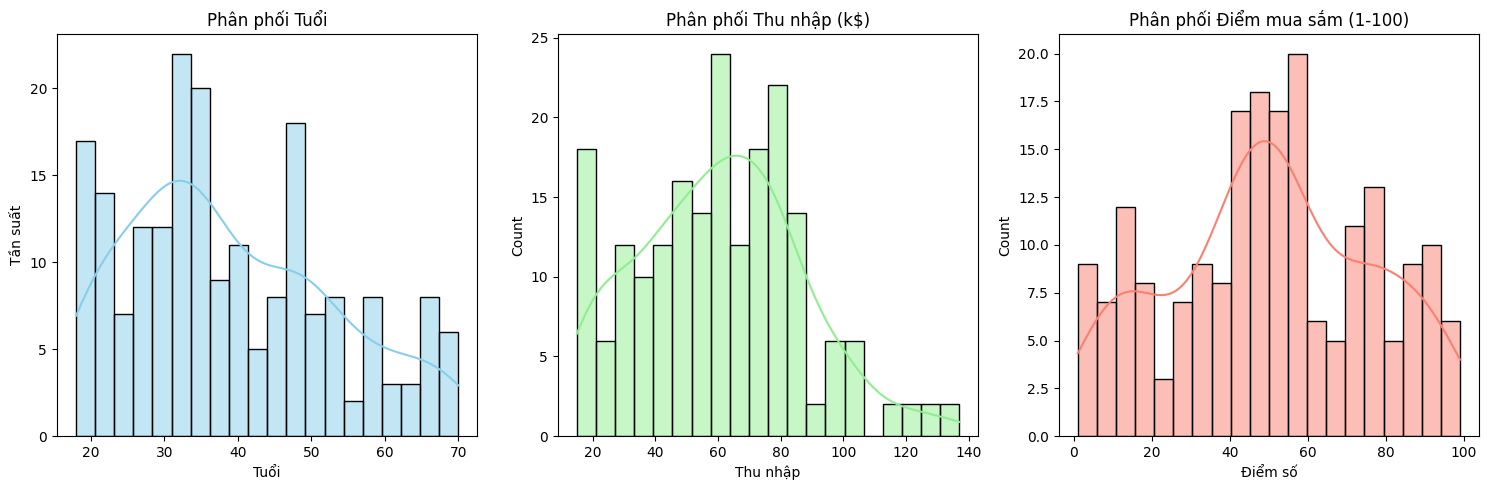

In [2]:
# --- CELL 2: CÂU 2 (Biểu đồ Histogram) ---
print("Nguyễn Đức Trung - 6351071072")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Tuoi'], bins=20, kde=True, color='skyblue')
plt.title('Phân phối Tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')

plt.subplot(1, 3, 2)
sns.histplot(df['ThuNhap'], bins=20, kde=True, color='lightgreen')
plt.title('Phân phối Thu nhập (k$)')
plt.xlabel('Thu nhập')

plt.subplot(1, 3, 3)
sns.histplot(df['DiemMuaSam'], bins=20, kde=True, color='salmon')
plt.title('Phân phối Điểm mua sắm (1-100)')
plt.xlabel('Điểm số')

plt.tight_layout()
plt.show()

Nguyễn Đức Trung - 6351071072


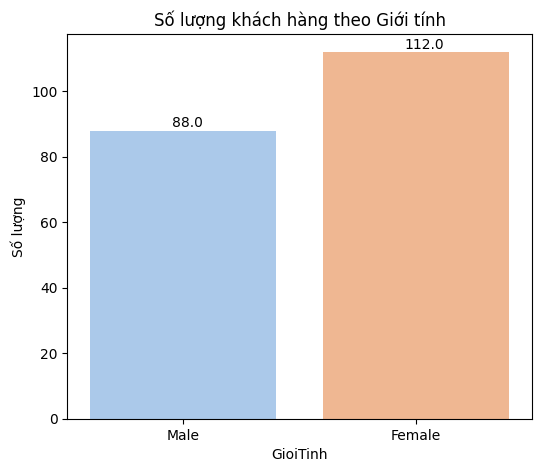

In [3]:
# --- CELL 3: CÂU 3 (Thống kê Giới tính) ---
print("Nguyễn Đức Trung - 6351071072")

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='GioiTinh', data=df, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 1))

plt.title('Số lượng khách hàng theo Giới tính')
plt.ylabel('Số lượng')
plt.show()

Nguyễn Đức Trung - 6351071072


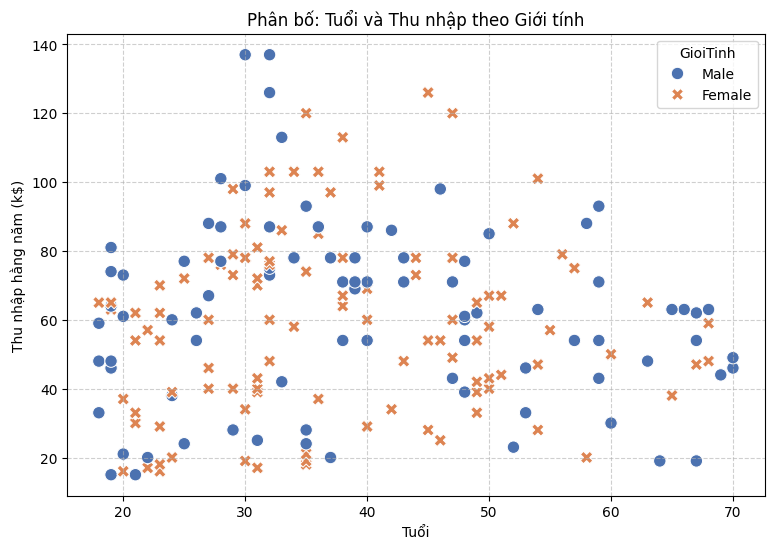

In [4]:
# --- CELL 4: CÂU 4 (Scatter: Tuổi vs Thu Nhập) ---
print("Nguyễn Đức Trung - 6351071072")

plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Tuoi', y='ThuNhap', hue='GioiTinh', style='GioiTinh', s=80, palette='deep')
plt.title('Phân bố: Tuổi và Thu nhập theo Giới tính')
plt.xlabel('Tuổi')
plt.ylabel('Thu nhập hằng năm (k$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Nguyễn Đức Trung - 6351071072


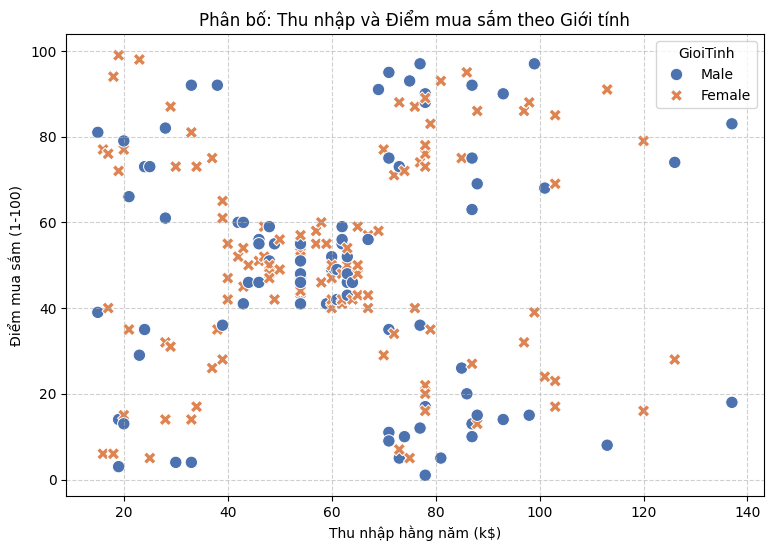

In [5]:
# --- CELL 5: CÂU 5 (Scatter: Thu Nhập vs Điểm Mua Sắm) ---
print("Nguyễn Đức Trung - 6351071072")

plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='ThuNhap', y='DiemMuaSam', hue='GioiTinh', style='GioiTinh', s=80, palette='deep')
plt.title('Phân bố: Thu nhập và Điểm mua sắm theo Giới tính')
plt.xlabel('Thu nhập hằng năm (k$)')
plt.ylabel('Điểm mua sắm (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Nguyễn Đức Trung - 6351071072


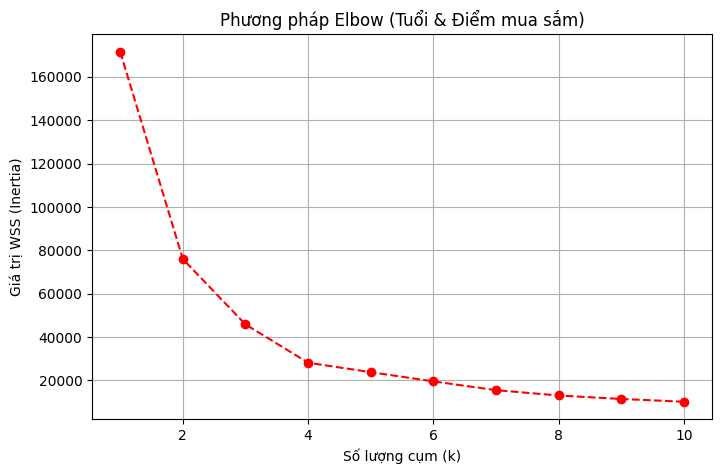

In [6]:
# --- CELL 6: CÂU 6a (Elbow Method: Tuổi & Điểm Mua Sắm) ---
print("Nguyễn Đức Trung - 6351071072")

X_age_score = df[['Tuoi', 'DiemMuaSam']].values
wss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_age_score)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wss, marker='o', color='red', linestyle='--')
plt.title('Phương pháp Elbow (Tuổi & Điểm mua sắm)')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Giá trị WSS (Inertia)')
plt.grid(True)
plt.show()

Nguyễn Đức Trung - 6351071072


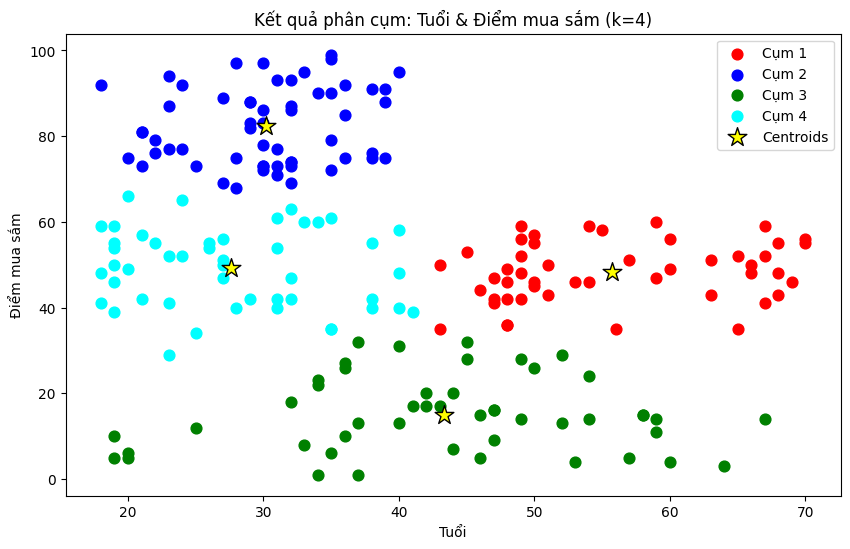

In [7]:
# --- CELL 7: CÂU 6b & 7 (Thực hiện Gom cụm k=4 & Vẽ biểu đồ) ---
print("Nguyễn Đức Trung - 6351071072")

kmeans_age = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
y_kmeans_age = kmeans_age.fit_predict(X_age_score)

plt.figure(figsize=(10, 6))
plt.scatter(X_age_score[y_kmeans_age == 0, 0], X_age_score[y_kmeans_age == 0, 1], s=60, c='red', label='Cụm 1')
plt.scatter(X_age_score[y_kmeans_age == 1, 0], X_age_score[y_kmeans_age == 1, 1], s=60, c='blue', label='Cụm 2')
plt.scatter(X_age_score[y_kmeans_age == 2, 0], X_age_score[y_kmeans_age == 2, 1], s=60, c='green', label='Cụm 3')
plt.scatter(X_age_score[y_kmeans_age == 3, 0], X_age_score[y_kmeans_age == 3, 1], s=60, c='cyan', label='Cụm 4')

plt.scatter(kmeans_age.cluster_centers_[:, 0], kmeans_age.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', edgecolor='black', label='Centroids')

plt.title('Kết quả phân cụm: Tuổi & Điểm mua sắm (k=4)')
plt.xlabel('Tuổi')
plt.ylabel('Điểm mua sắm')
plt.legend()
plt.show()

In [8]:
# --- CELL 8: CÂU 8 (Hệ số Silhouette) ---
print("Nguyễn Đức Trung - 6351071072")

score_age = silhouette_score(X_age_score, y_kmeans_age)
print(f"Hệ số Silhouette (Tuổi & Điểm mua sắm, k=4): {score_age:.4f}")

Nguyễn Đức Trung - 6351071072
Hệ số Silhouette (Tuổi & Điểm mua sắm, k=4): 0.4997


Nguyễn Đức Trung - 6351071072


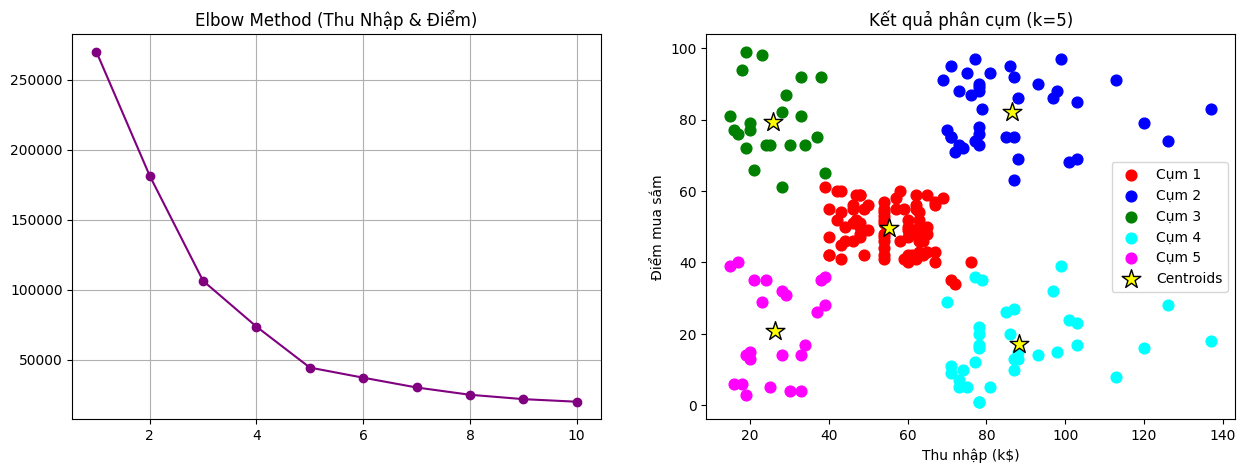

Hệ số Silhouette (Thu nhập & Điểm, k=5): 0.5539


In [9]:
# --- CELL 9: CÂU 9a (Gom cụm: Thu Nhập & Điểm Mua Sắm) ---
print("Nguyễn Đức Trung - 6351071072")

X_income_score = df[['ThuNhap', 'DiemMuaSam']].values
wss2 = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_income_score)
    wss2.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wss2, marker='o', color='purple')
plt.title('Elbow Method (Thu Nhập & Điểm)')
plt.grid(True)

kmeans_inc = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans_inc = kmeans_inc.fit_predict(X_income_score)

plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X_income_score[y_kmeans_inc == i, 0], X_income_score[y_kmeans_inc == i, 1],
                s=60, c=colors[i], label=f'Cụm {i+1}')

plt.scatter(kmeans_inc.cluster_centers_[:, 0], kmeans_inc.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', edgecolor='black', label='Centroids')
plt.title('Kết quả phân cụm (k=5)')
plt.xlabel('Thu nhập (k$)')
plt.ylabel('Điểm mua sắm')
plt.legend()
plt.show()

score_inc = silhouette_score(X_income_score, y_kmeans_inc)
print(f"Hệ số Silhouette (Thu nhập & Điểm, k=5): {score_inc:.4f}")

In [10]:
# --- CELL 10: CÂU 9b (Gom cụm 3D: Tuổi, Thu Nhập, Điểm) ---
print("Nguyễn Đức Trung - 6351071072")

X_3d = df[['Tuoi', 'ThuNhap', 'DiemMuaSam']].values
kmeans_3d = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=42)
y_kmeans_3d = kmeans_3d.fit_predict(X_3d)

df['Cluster_Label'] = y_kmeans_3d
score_3d = silhouette_score(X_3d, y_kmeans_3d)
print(f"Hệ số Silhouette (3D, k=6): {score_3d:.4f}")

fig = px.scatter_3d(df,
                    x='Tuoi',
                    y='ThuNhap',
                    z='DiemMuaSam',
                    color='Cluster_Label',
                    title='Biểu đồ Gom cụm 3D (Tuổi - Thu Nhập - Điểm Mua Sắm)',
                    labels={'Cluster_Label': 'Nhãn Cụm'},
                    opacity=0.8)
fig.update_traces(marker=dict(size=5))
fig.show()

Nguyễn Đức Trung - 6351071072
Hệ số Silhouette (3D, k=6): 0.4523
